## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [2]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

2023-04-24 00:09:05.497769: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                )

2023-04-24 00:09:20.130155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2508 - val_loss: 0.1879
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1791 - val_loss: 0.1721
Epoch 3/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1696 - val_loss: 0.1660
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1643 - val_loss: 0.1620
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1609 - val_loss: 0.1600
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1586 - val_loss: 0.1576
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1568 - val_loss: 0.1561
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1552 - val_loss: 0.1544
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1538 - val_loss: 0.1533
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1526 - val_lo

235/235 [==============================] - 2s 7ms/step - loss: 0.1348 - val_loss: 0.1412
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1347 - val_loss: 0.1410
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1348 - val_loss: 0.1407
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1346 - val_loss: 0.1411
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1345 - val_loss: 0.1410
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1345 - val_loss: 0.1410
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1345 - val_loss: 0.1409
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1344 - val_loss: 0.1412
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1343 - val_loss: 0.1409
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1343 - val_loss: 

In [5]:
autoencoder.evaluate(xtest, xtest, verbose = 0)

0.14108693599700928

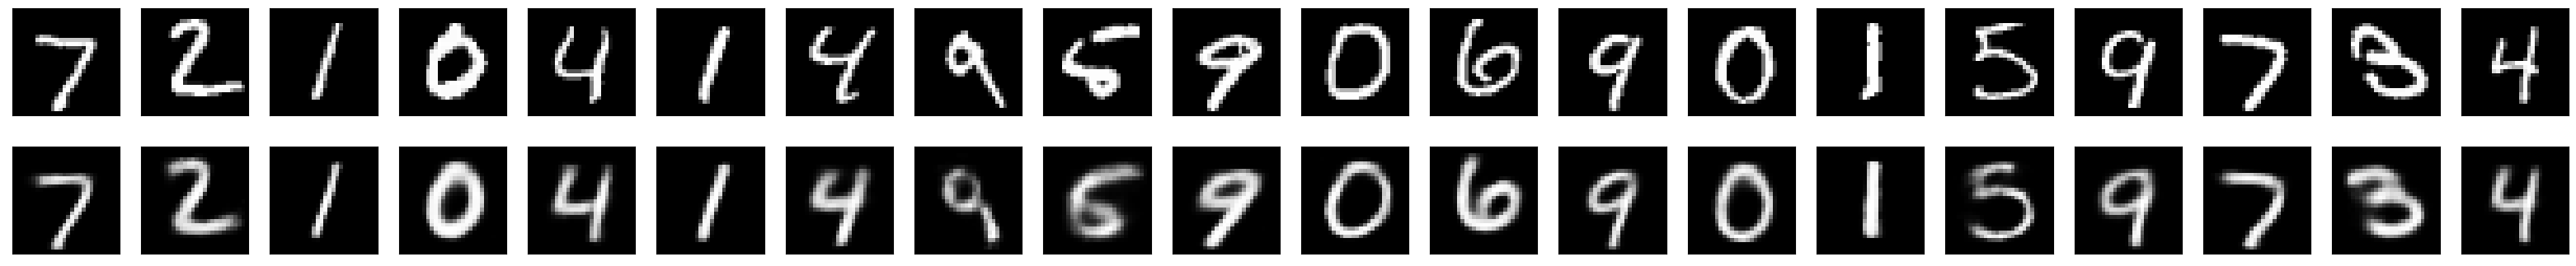

In [6]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
encoded_imgs

array([[ 8.121867 , 41.15789  , 16.332258 ,  7.376401 ],
       [24.201841 , 21.127634 , 16.845016 ,  6.0990424],
       [36.83489  , 51.335476 , 28.910124 , 18.496061 ],
       ...,
       [12.324904 , 30.052652 ,  9.990883 , 21.742424 ],
       [17.130564 , 16.039772 ,  4.0078583, 14.629419 ],
       [15.10408  , 16.662783 , 11.55282  , 26.731108 ]], dtype=float32)

In [8]:
np.max(encoded_imgs)

66.474236

In [9]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

In [10]:
noise

array([[20.07561402, 21.32106027, 21.23946429, 21.70652002],
       [23.88273129, 17.89626404, 22.62913063, 20.43102977],
       [18.65630753, 24.97829953, 23.56176308, 19.2978824 ],
       [21.30138864, 26.72723809, 22.82092237, 25.98322885]])

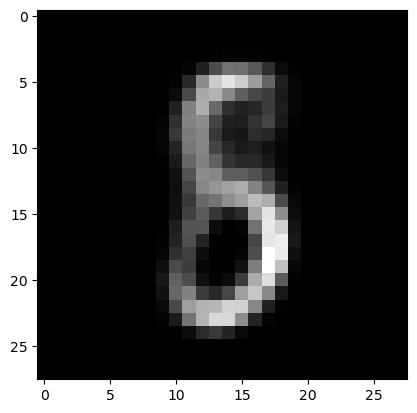

In [11]:
plt.imshow(noise_preds[1].reshape(28,28))

In [12]:
%matplotlib inline

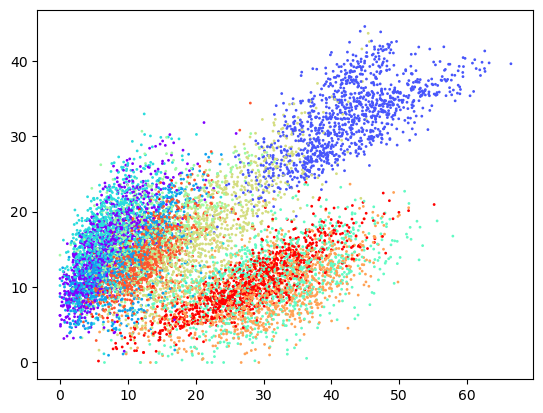

In [13]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

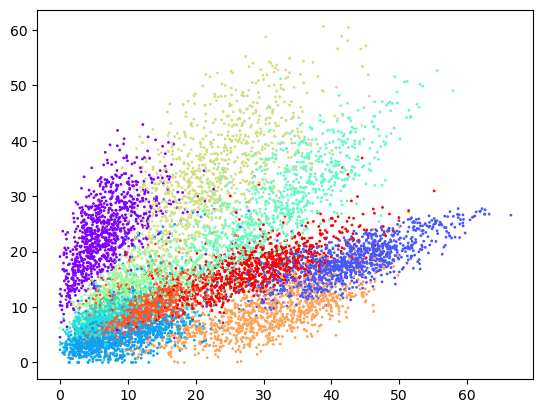

In [14]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

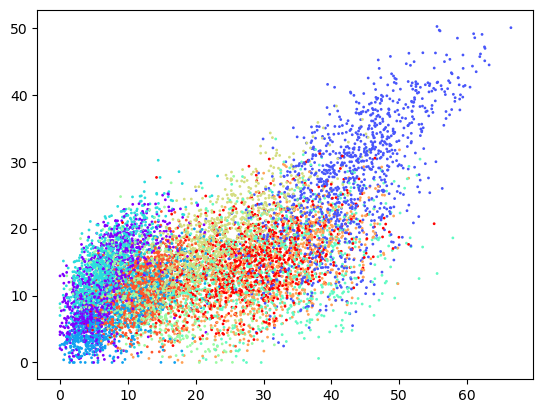

In [15]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

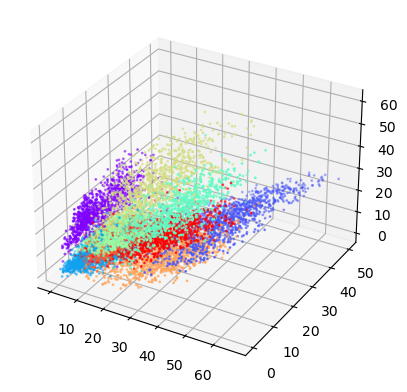

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [17]:
losses = []
dimensions = range(2,18,2)

for encoding_dim in dimensions:
    
    print(encoding_dim)
    
    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
    
    loss = autoencoder.evaluate(xtest, xtest, verbose=0)
    losses.append(loss)
    

2
Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2755 - val_loss: 0.2494
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2450 - val_loss: 0.2387
Epoch 3/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2356 - val_loss: 0.2315
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2299 - val_loss: 0.2275
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2272 - val_loss: 0.2259
Epoch 6/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2251 - val_loss: 0.2238
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2224 - val_loss: 0.2209
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2194 - val_loss: 0.2181
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2170 - val_loss: 0.2160
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2152 - val_

235/235 [==============================] - 2s 7ms/step - loss: 0.1951 - val_loss: 0.1956
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1954 - val_loss: 0.1955
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1957 - val_loss: 0.1948
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1950 - val_loss: 0.1948
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1945 - val_loss: 0.1941
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1944 - val_loss: 0.1940
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1946 - val_loss: 0.1940
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1948 - val_loss: 0.1944
Epoch 89/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1950 - val_loss: 0.1939
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1940 - val_loss: 

235/235 [==============================] - 2s 7ms/step - loss: 0.1360 - val_loss: 0.1412
Epoch 62/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1359 - val_loss: 0.1411
Epoch 63/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1358 - val_loss: 0.1411
Epoch 64/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1358 - val_loss: 0.1413
Epoch 65/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1356 - val_loss: 0.1412
Epoch 66/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1356 - val_loss: 0.1412
Epoch 67/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1355 - val_loss: 0.1409
Epoch 68/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1354 - val_loss: 0.1411
Epoch 69/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1354 - val_loss: 0.1409
Epoch 70/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1353 - val_loss: 

235/235 [==============================] - 2s 8ms/step - loss: 0.1300 - val_loss: 0.1329
Epoch 42/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1297 - val_loss: 0.1330
Epoch 43/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1295 - val_loss: 0.1330
Epoch 44/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1294 - val_loss: 0.1329
Epoch 45/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1292 - val_loss: 0.1325
Epoch 46/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1290 - val_loss: 0.1326
Epoch 47/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1289 - val_loss: 0.1324
Epoch 48/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1288 - val_loss: 0.1322
Epoch 49/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1286 - val_loss: 0.1322
Epoch 50/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1285 - val_loss: 

235/235 [==============================] - 2s 8ms/step - loss: 0.1201 - val_loss: 0.1208
Epoch 22/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1197 - val_loss: 0.1206
Epoch 23/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1194 - val_loss: 0.1202
Epoch 24/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1190 - val_loss: 0.1199
Epoch 25/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1187 - val_loss: 0.1195
Epoch 26/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1183 - val_loss: 0.1196
Epoch 27/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1180 - val_loss: 0.1194
Epoch 28/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1178 - val_loss: 0.1191
Epoch 29/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1175 - val_loss: 0.1190
Epoch 30/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1172 - val_loss: 

235/235 [==============================] - 2s 8ms/step - loss: 0.2492 - val_loss: 0.1737
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1545 - val_loss: 0.1419
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1388 - val_loss: 0.1338
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1314 - val_loss: 0.1278
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1268 - val_loss: 0.1239
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1235 - val_loss: 0.1207
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1198 - val_loss: 0.1176
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1172 - val_loss: 0.1153
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1154 - val_loss: 0.1143
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1139 - val_loss: 0.1126
E

235/235 [==============================] - 2s 7ms/step - loss: 0.0980 - val_loss: 0.1010
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0979 - val_loss: 0.1011
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0978 - val_loss: 0.1007
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0978 - val_loss: 0.1009
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0978 - val_loss: 0.1010
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0977 - val_loss: 0.1008
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0977 - val_loss: 0.1009
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0976 - val_loss: 0.1006
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0976 - val_loss: 0.1008
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0975 - val_loss: 

235/235 [==============================] - 2s 7ms/step - loss: 0.1033 - val_loss: 0.1057
Epoch 62/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1032 - val_loss: 0.1055
Epoch 63/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1031 - val_loss: 0.1057
Epoch 64/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1030 - val_loss: 0.1056
Epoch 65/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1029 - val_loss: 0.1056
Epoch 66/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1028 - val_loss: 0.1057
Epoch 67/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1028 - val_loss: 0.1056
Epoch 68/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1026 - val_loss: 0.1053
Epoch 69/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1026 - val_loss: 0.1052
Epoch 70/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1025 - val_loss: 

235/235 [==============================] - 2s 7ms/step - loss: 0.0929 - val_loss: 0.0937
Epoch 42/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0927 - val_loss: 0.0935
Epoch 43/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0933
Epoch 44/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0924 - val_loss: 0.0933
Epoch 45/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0923 - val_loss: 0.0933
Epoch 46/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0922 - val_loss: 0.0931
Epoch 47/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0920 - val_loss: 0.0932
Epoch 48/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0920 - val_loss: 0.0932
Epoch 49/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0918 - val_loss: 0.0930
Epoch 50/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0918 - val_loss: 

235/235 [==============================] - 2s 7ms/step - loss: 0.0973 - val_loss: 0.0973
Epoch 22/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0969 - val_loss: 0.0968
Epoch 23/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0966 - val_loss: 0.0966
Epoch 24/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0962 - val_loss: 0.0963
Epoch 25/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0960 - val_loss: 0.0959
Epoch 26/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0957 - val_loss: 0.0959
Epoch 27/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0954 - val_loss: 0.0955
Epoch 28/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0952 - val_loss: 0.0954
Epoch 29/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0950 - val_loss: 0.0952
Epoch 30/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0947 - val_loss:

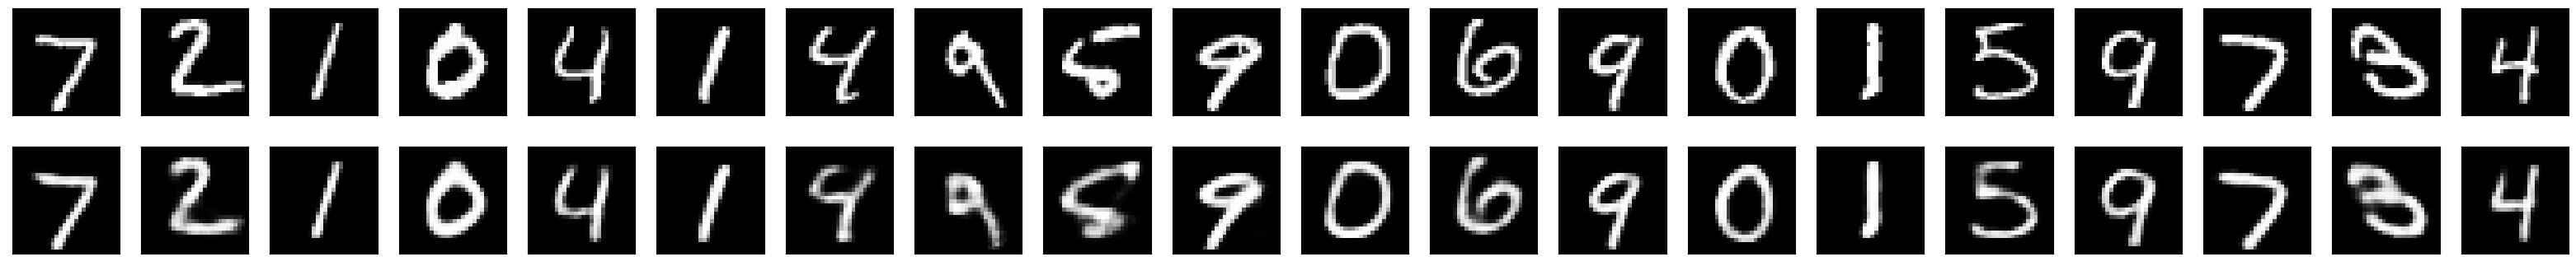

In [18]:
# example with encoding dim at 16 after previous block is run
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
losses

[0.1930532604455948,
 0.1406082808971405,
 0.12566663324832916,
 0.11441220343112946,
 0.10058099031448364,
 0.10441082715988159,
 0.09129456430673599,
 0.0907890573143959]

Text(0, 0.5, 'Loss Scores')

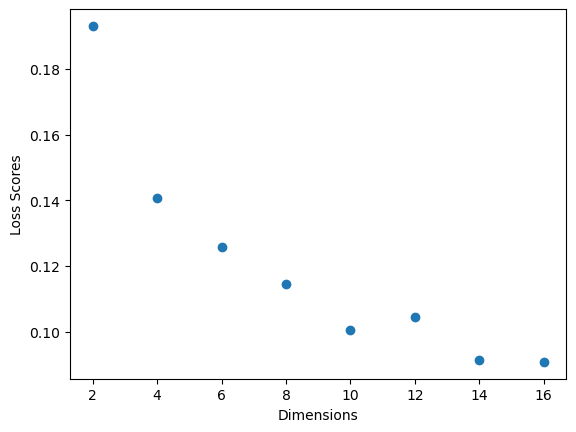

In [20]:
plt.figure()
plt.scatter(dimensions, losses)
plt.xlabel("Dimensions")
plt.ylabel("Loss Scores")



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

0.1
Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2653 - val_loss: 0.2331
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2193 - val_loss: 0.2111
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2020 - val_loss: 0.1928
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1870 - val_loss: 0.1816
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1777 - val_loss: 0.1734
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1673 - val_loss: 0.1618
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1598 - val_loss: 0.1545
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1525 - val_loss: 0.1492
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1489 - val_loss: 0.1465
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1464 - va

235/235 [==============================] - 2s 7ms/step - loss: 0.1245 - val_loss: 0.1262
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1246 - val_loss: 0.1263
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1244 - val_loss: 0.1266
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1244 - val_loss: 0.1264
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1243 - val_loss: 0.1262
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1242 - val_loss: 0.1264
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1242 - val_loss: 0.1265
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1241 - val_loss: 0.1269
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1240 - val_loss: 0.1269
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1240 - val_loss:

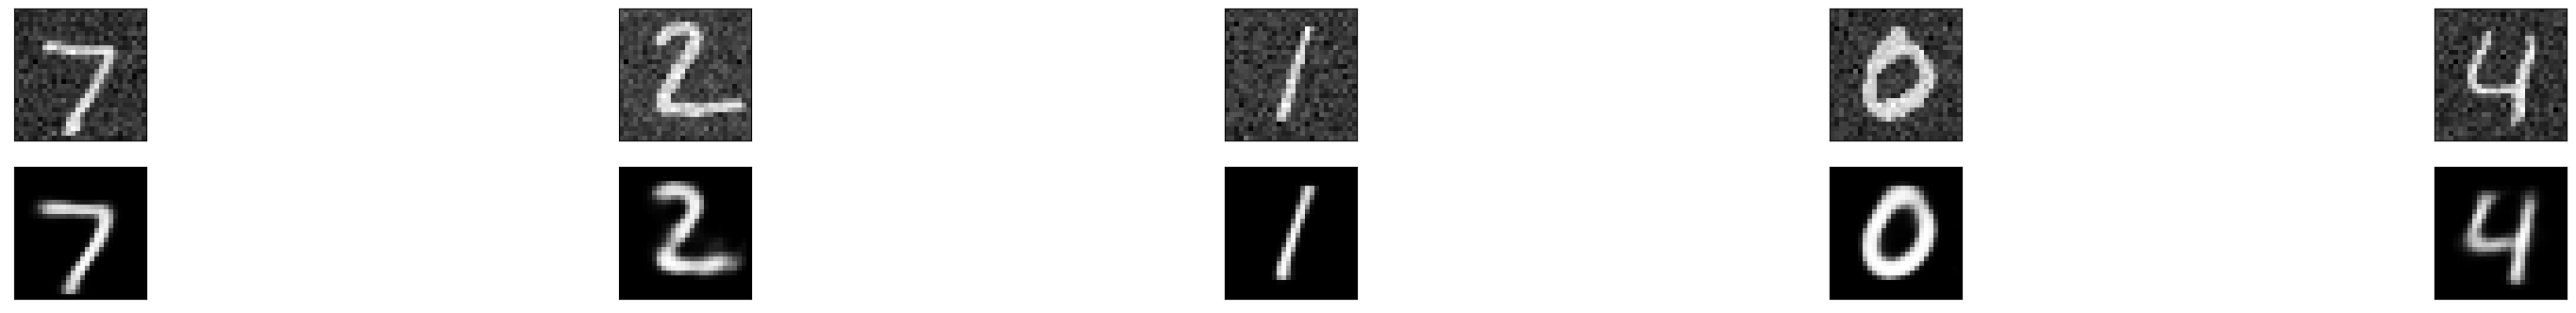

0.5
Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1487 - val_loss: 0.1462
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1442 - val_loss: 0.1452
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1423 - val_loss: 0.1434
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1410 - val_loss: 0.1431
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1401 - val_loss: 0.1429
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1395 - val_loss: 0.1419
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1389 - val_loss: 0.1418
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1385 - val_loss: 0.1417
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1380 - val_loss: 0.1413
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1377 - va

235/235 [==============================] - 2s 8ms/step - loss: 0.1309 - val_loss: 0.1417
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1309 - val_loss: 0.1419
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1307 - val_loss: 0.1418
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1307 - val_loss: 0.1417
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1307 - val_loss: 0.1417
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1308 - val_loss: 0.1411
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1306 - val_loss: 0.1414
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1306 - val_loss: 0.1417
Epoch 89/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1305 - val_loss: 0.1418
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1305 - val_loss: 

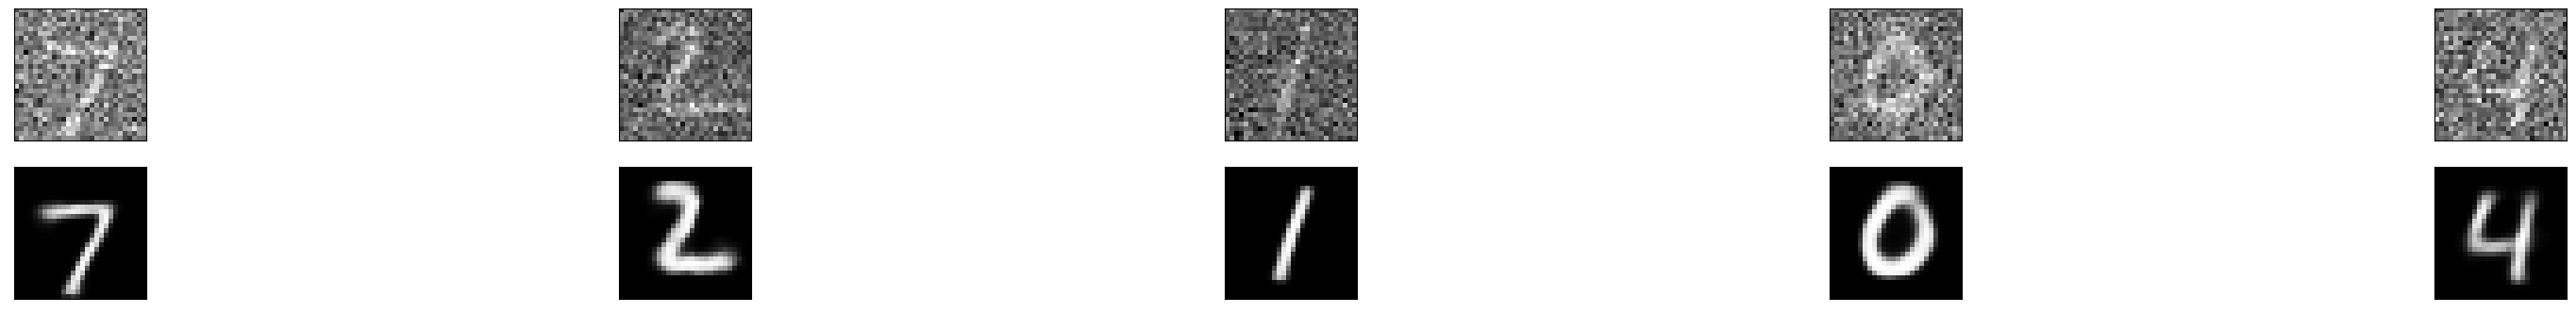

1.0
Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1790 - val_loss: 0.1731
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1704 - val_loss: 0.1707
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1670 - val_loss: 0.1692
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1649 - val_loss: 0.1684
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1632 - val_loss: 0.1687
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1621 - val_loss: 0.1683
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1610 - val_loss: 0.1682
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1602 - val_loss: 0.1679
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1595 - val_loss: 0.1678
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1588 - va

235/235 [==============================] - 2s 7ms/step - loss: 0.1492 - val_loss: 0.1749
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1493 - val_loss: 0.1753
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1492 - val_loss: 0.1755
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1491 - val_loss: 0.1755
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1492 - val_loss: 0.1758
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1490 - val_loss: 0.1755
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1490 - val_loss: 0.1770
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1489 - val_loss: 0.1760
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1491 - val_loss: 0.1764
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1488 - val_loss: 

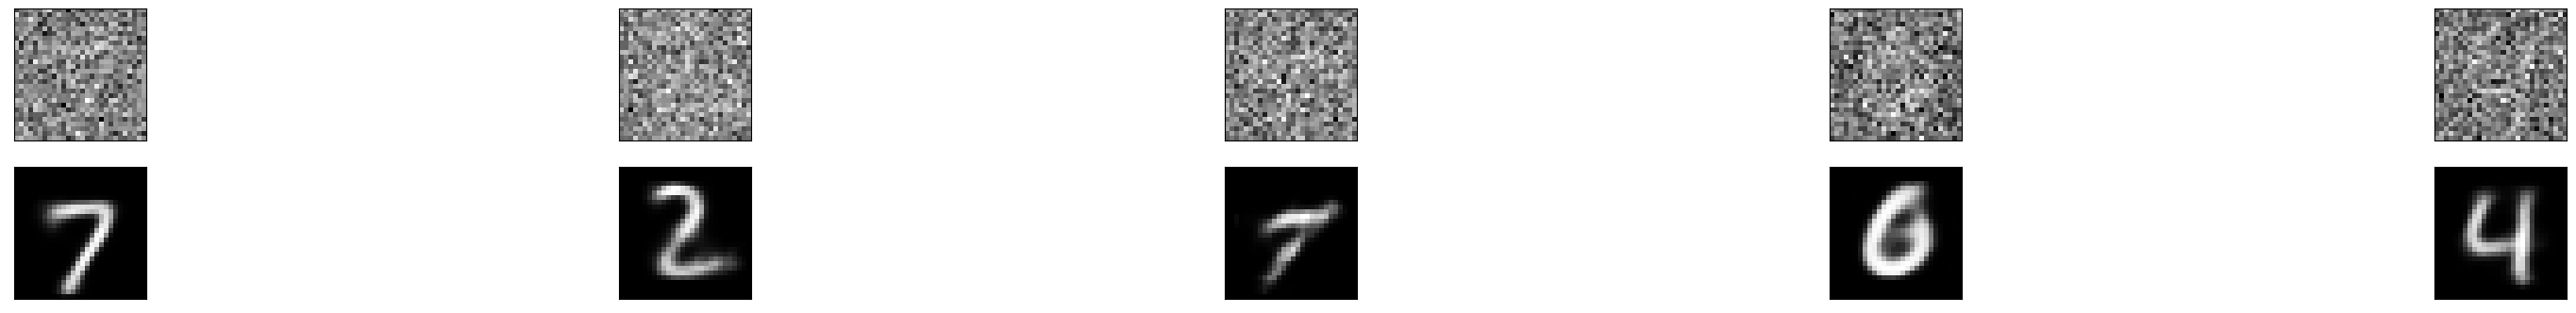

2.0
Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2289 - val_loss: 0.2238
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2194 - val_loss: 0.2212
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2156 - val_loss: 0.2199
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2130 - val_loss: 0.2192
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2109 - val_loss: 0.2196
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2091 - val_loss: 0.2198
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2074 - val_loss: 0.2198
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2059 - val_loss: 0.2208
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2047 - val_loss: 0.2211
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2035 - v

235/235 [==============================] - 2s 7ms/step - loss: 0.1808 - val_loss: 0.2543
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1805 - val_loss: 0.2551
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1806 - val_loss: 0.2533
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1806 - val_loss: 0.2544
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1806 - val_loss: 0.2552
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1804 - val_loss: 0.2544
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1802 - val_loss: 0.2569
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1804 - val_loss: 0.2560
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1802 - val_loss: 0.2570
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1801 - val_loss: 

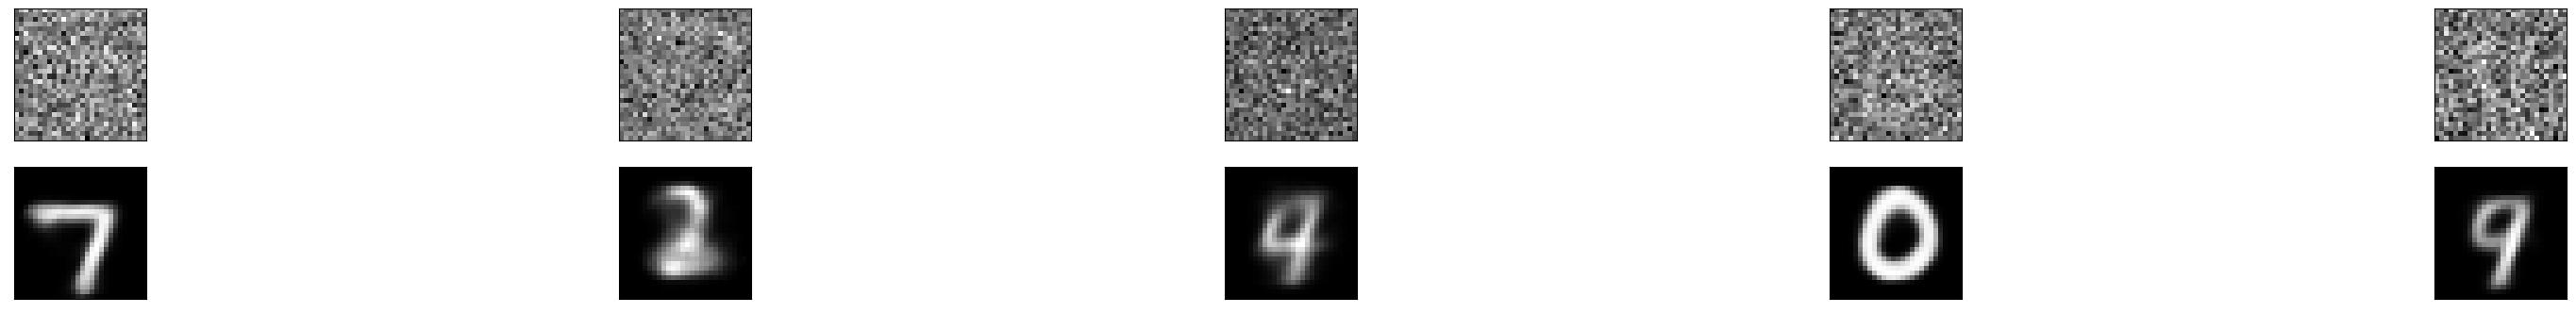

4.0
Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2612 - val_loss: 0.2542
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2527 - val_loss: 0.2525
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2499 - val_loss: 0.2519
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2471 - val_loss: 0.2529
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2439 - val_loss: 0.2541
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2406 - val_loss: 0.2552
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2374 - val_loss: 0.2579
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2343 - val_loss: 0.2610
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2316 - val_loss: 0.2628
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2289 - va

235/235 [==============================] - 2s 8ms/step - loss: 0.1875 - val_loss: 0.3470
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1873 - val_loss: 0.3495
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1870 - val_loss: 0.3523
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1869 - val_loss: 0.3495
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1867 - val_loss: 0.3516
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1866 - val_loss: 0.3532
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1865 - val_loss: 0.3521
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1862 - val_loss: 0.3541
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1861 - val_loss: 0.3509
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1859 - val_loss: 

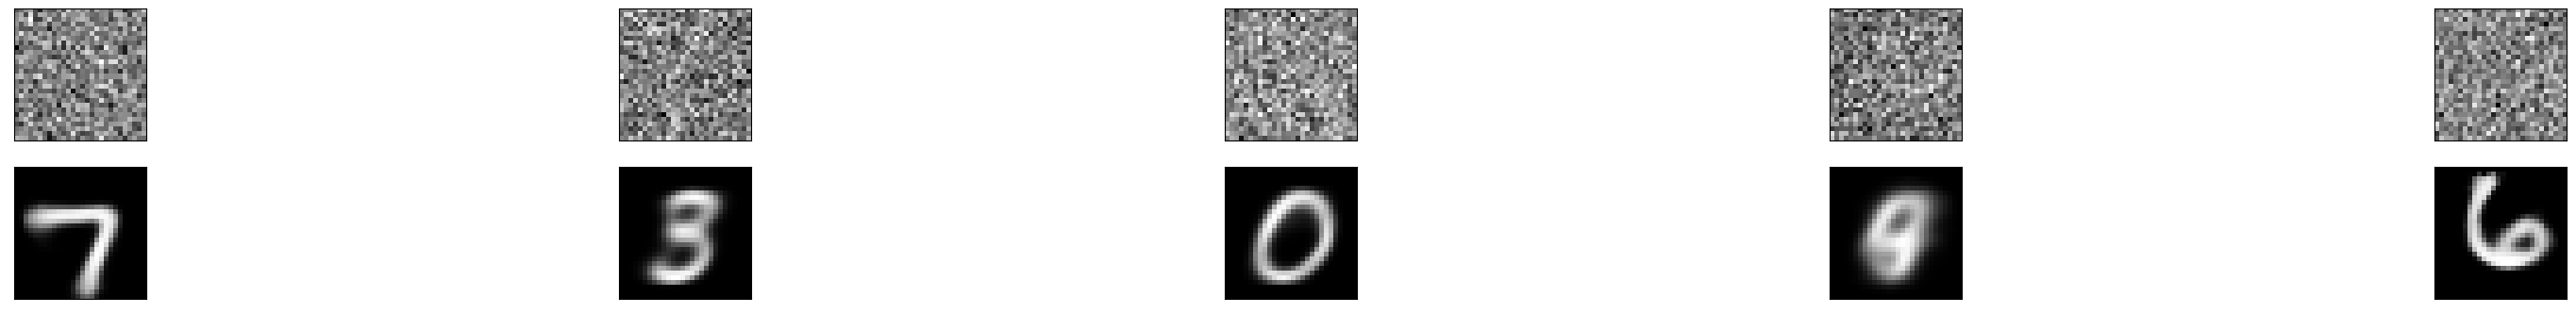

In [21]:
losses = []
encoding_dim = 8
scales = [.1, .5, 1.0, 2.0, 4.0]
    
# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

for scale in scales:
    print(scale)
    
    noise = np.random.normal(loc=1, scale=scale, size=xtrain.shape)
    xtrain_noisy = xtrain + noise
        
    noise = np.random.normal(loc=1, scale=scale, size=xtest.shape)
    xtest_noisy = xtest + noise
    
    autoencoder.fit(xtrain_noisy, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noisy, xtest))
    
    loss = autoencoder.evaluate(xtest_noisy, xtest, verbose=0)
    losses.append(loss)
    
    encoded_imgs = encoder.predict(xtest_noisy)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 5  # how many digits we will display
    plt.figure(figsize=(40, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xtest_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

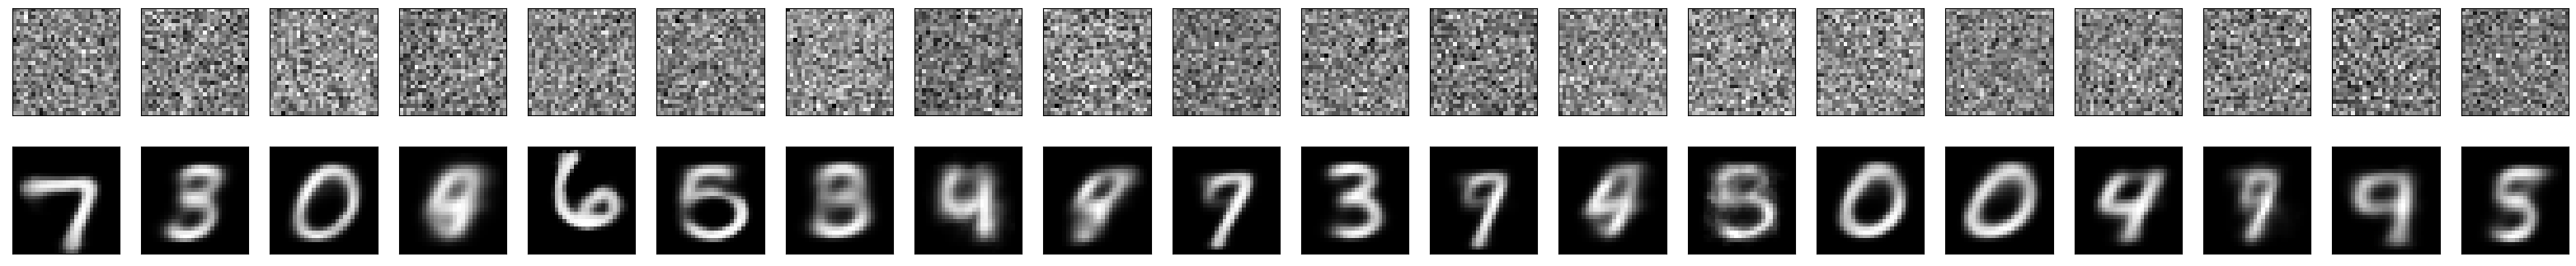

In [22]:
# example with the noise scale at 4.0 after the previous block is run
encoded_imgs = encoder.predict(xtest_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
losses

[0.1256238967180252,
 0.14162208139896393,
 0.17681051790714264,
 0.25611573457717896,
 0.35957613587379456]

Text(0, 0.5, 'Loss Scores')

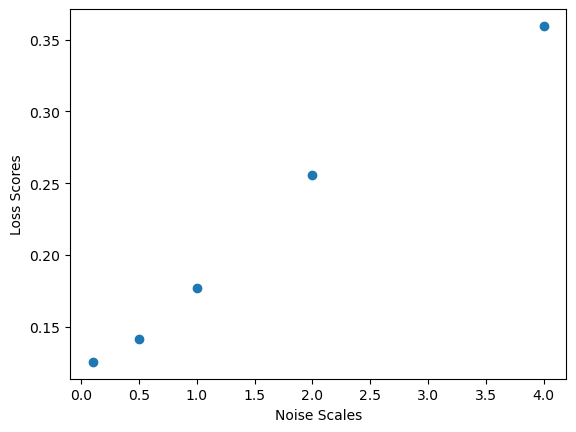

In [24]:
plt.figure()
plt.scatter(scales, losses)
plt.xlabel("Noise Scales")
plt.ylabel("Loss Scores")